# Venue In Bournemouth

## Intro

Our problem is to organize ourselves around the poles of the attractiveness of a city, particularly for tourism.

When visitors discover a city, it is often difficult to find the poles of other activities. For example, where there is a concentration of bars or a cultural venue or a concentration of other touristic places. This is why we are going to try to make clusters in the city the poles of attractiveness. We will use the geolocation data as well as the type of interaction and the elements of force to carry out our project.


The final goal is to come up with a map with all the city elements and make a minimum viable Product to prove our concept. We will use a file that we took from Kaggle and in the town of Bournemouth.

## Merthodology 
For the methodology we are gonna use the web scrapping using the review of google map. 
After that we are gonna use folium Map to map all the venue of bournemouth

##  Data Vizualisation and exploration of the data set 

In [1]:
import pandas as pd 
from urllib.request import Request, urlopen # for opening a connection to a website
from bs4 import BeautifulSoup #web scraping 
import folium #map visualization
import html
import sys # mostly used for debugging purposes
#matplotlib for graphs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
import seaborn as sns
import re

print('Libraries imported!')

Libraries imported!


In [2]:
df= pd.read_csv('bournemouth_venues.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Venue Name       100 non-null    object 
 1   Venue Category   100 non-null    object 
 2   Venue Latitude   100 non-null    float64
 3   Venue Longitude  100 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


In [4]:
df['Venue Category'] = df['Venue Category'].astype(str)

In [5]:
df.sample(n = 10)

,Venue Name,Venue Category,Venue Latitude,Venue Longitude
76,The Winchester,Bar,50.719721,-1.887661
97,The Garden Restaurant - Cottonwood Boutique Hotel,Hotel,50.719795,-1.858884
53,Indian Ocean,Indian Restaurant,50.716796,-1.882883
83,The Durley Dean Hotel,Hotel,50.716170,-1.888197
24,Starbucks,Coffee Shop,50.720390,-1.884166
40,The Green House,Hotel,50.719407,-1.868267
71,Troy Turkish Restaurant,Turkish Restaurant,50.720044,-1.885345
65,"Da Mario, wood-fired pizza",Italian Restaurant,50.721603,-1.892844
12,Esquire Coffee,Coffee Shop,50.721469,-1.876114
95,Platform 1,Platform,50.727287,-1.863021


In [6]:
# as you can see we have many  Venue category 
df['Venue Category'].nunique()
# in total we have 51 Venue Category

51

In [7]:
df.shape
# we have 100 venue 

(100, 4)

In [8]:
df = df.rename(columns={
'Venue Name': 'Name',
'Venue Category': 'Category',
'Venue Latitude': 'Latitude',
'Venue Longitude': 'Longitude'})
df_pivot = pd.pivot_table(df, index=['Name'], aggfunc='count')

#Filter our pivot table to only show venues that occur more than once
df_pivot_filter = df_pivot[df_pivot.Category > 1]


Total_venues = len(df.Name) #total number of venues in our data
chain_venues = len(df_pivot_filter.Category)

In [9]:
df_catapivot = pd.pivot_table(df, index=['Category'], aggfunc='count')
print(df_catapivot.head())

                      Latitude  Longitude  Name
Category                                       
Aquarium                     1          1     1
Art Museum                   1          1     1
Arts & Entertainment         1          1     1
Bar                          3          3     3
Beach                        4          4     4


In [10]:
del df_catapivot["Latitude"]
del df_catapivot["Longitude"]

#rename "Name" colum to "count" as, that is what its showing
df_catapivot = df_catapivot.rename(columns={'Name': 'Count'})

#set an integer index and keep the former index as a new column
df_catapivot = df_catapivot.reset_index(drop=False)

print(df_catapivot.head())

               Category  Count
0              Aquarium      1
1            Art Museum      1
2  Arts & Entertainment      1
3                   Bar      3
4                 Beach      4


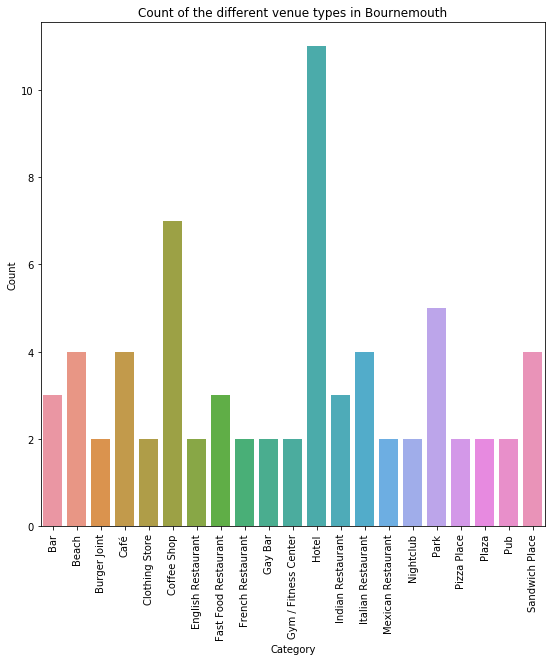

In [11]:
df_catapivot_filt = df_catapivot[df_catapivot.Count > 1]


# And finally plotting the bar plot with filtered data



#create a new figure instance
fig = plt.figure(figsize=(7,7))

#create a new axes for this plot. 
ax = fig.add_axes([1,1,1,1])

#details

#set title
ax.set_title("Count of the different venue types in Bournemouth")
#rotate x-axis labels
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)


#plot the bar plot using seaborn
sns.barplot(df_catapivot_filt["Category"],df_catapivot_filt["Count"])

In [12]:
conda install -c conda-forge wordcloud


Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [13]:
! pip3 install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [14]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
text = " ".join(review for review in df['Category'].astype(str))

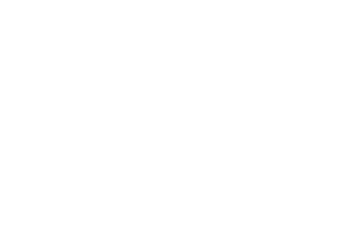

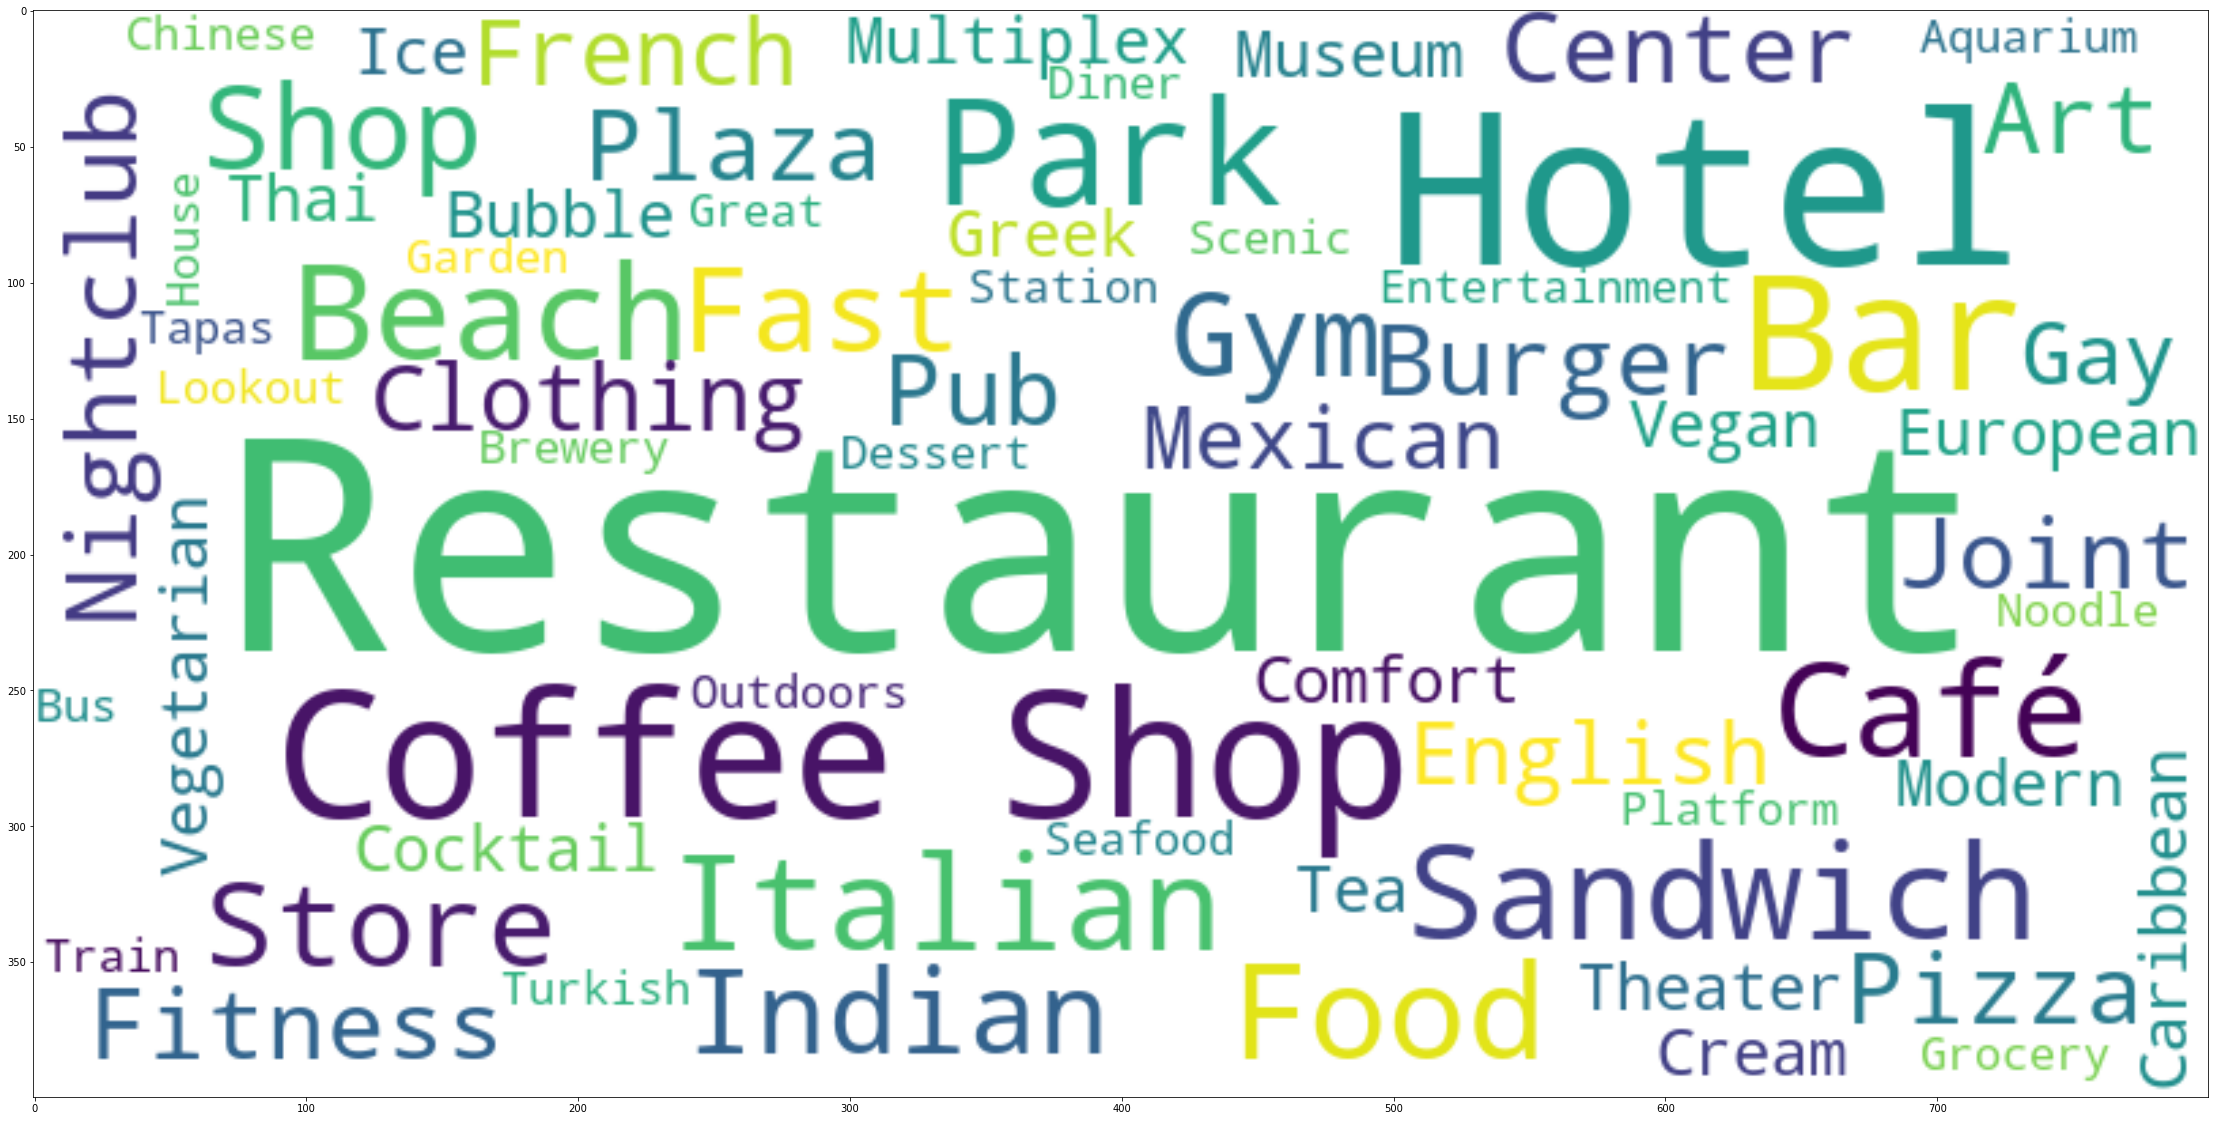

In [17]:
stopwords = set(STOPWORDS)
stopwords.update(["Stop", "Place"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the generated image:
# the matplotlib way:

plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Strinping the review from google map

In [19]:
df_pivot_filter

,Category,Latitude,Longitude
Name,,,
Caffè Nero,2,2,2
Starbucks,2,2,2
Subway,2,2,2


In [20]:

i = 0

for i in range (len(df["Name"])):
    
    venue = df.loc[i,"Name"]
    
    #check if the string venue has "’"  and if so replace with"'"
    venue = venue.replace("’","'")

    #we wil effectivly do a google search. so we will constuct this here:
    #we search for: "UK Bournemouth venueName" - this should give us a side box with venue details in google
    location = "UK Bournemouth " + venue
    
    #constructing the weblink
    web = "https://www.google.com/search?safe=active&source=hp&ei=bo4vXfiVIY-yUtPGomg&q="
    web_full = web + location.replace(" ","+")

    req = Request(web_full, headers={'User-Agent': 'Mozilla/5.0'})
    
    
    
    
    
    #open the webpage and read
    page = urlopen(req).read()
    
    #using beautiful soup turn the html of the page into a soup format 
    soup = BeautifulSoup(page, 'html.parser')
    
    
    
    #Once we grab the review data, we check it its a value or "none"
    #if it is "none", we get an attribute error which we will except and go on to store "nan"
    try:
        data1 = soup.find('span', attrs={'class': 'oqSTJd'})
        score = data1.text.strip() # strip() is used to remove starting and trailing
        
        df.loc[i,"Review"] = score  #store the score into dfbs
        
    except AttributeError:
        df.loc[i,"Review"] = 0.0 # since no score was available, set score to 0
        
    i +=1

    
#show the first fiew rows of our dataframe
print(df.head())

UnicodeEncodeError: 'ascii' codec can't encode character '\xe8' in position 78: ordinal not in range(128)

In [23]:
df.head()

,Name,Category,Latitude,Longitude,Review
0,South Coast Roast,Coffee Shop,50.720913,-1.879085,"4,8"
1,DelMarco,Italian Restaurant,50.721370,-1.877221,"4,7"
2,Lower Gardens,Park,50.719323,-1.878195,"4,6"
3,Bournemouth Gardens,Park,50.718990,-1.877733,"4,6"
4,Bournemouth Square,Plaza,50.720156,-1.879563,"4,0"


## Mapping

In [26]:
map_clusters = folium.Map(location=[50.727092, -1.861248], zoom_start=10)

In [27]:
df.head()

,Name,Category,Latitude,Longitude,Review
0,South Coast Roast,Coffee Shop,50.720913,-1.879085,"4,8"
1,DelMarco,Italian Restaurant,50.721370,-1.877221,"4,7"
2,Lower Gardens,Park,50.719323,-1.878195,"4,6"
3,Bournemouth Gardens,Park,50.718990,-1.877733,"4,6"
4,Bournemouth Square,Plaza,50.720156,-1.879563,"4,0"


In [ ]:
df['Review'] = df['Review'].astype(str)

In [24]:
Bournemouth_coord = (50.720806, -1.904755)

# create empty map zoomed in on Bournemouth
bournemap = folium.Map(location=Bournemouth_coord, zoom_start=12)

rownum = len(dfbs["Name"])
i = 0

for i in range(0,rownum):    

    name = df.loc[i,"Name"]
    cate = df.loc[i,"Category"]
    review =df.loc[i,"Review"]
    text = str(name + " (" + cate + " |Review: " + review +") ")
    folium.CircleMarker(
        [df.loc[i,"Latitude"], df.loc[i,"Longitude"]],
        radius=8,
        popup = html.escape(text),
        color='blue',
        fill_color='green',
        fill=True,
        fill_opacity=0.7,
        clustered_marker = True
        ).add_to(bournemap)
    
    i += 1


#display our map
print("Map of Bournemouth with venue locations")
display(bournemap)

Map of Bournemouth with venue locations


In [ ]:
#Now we have a map with all the Venue of the city with the reviews. 